In [1]:
basepath = '/usr/share/export/web-traffic-time-series-forecasting'

In [2]:
import os
os.listdir(basepath)

['sample_submission_1.csv',
 'key_1.csv',
 'train_1.csv.zip',
 'sample_submission_1.csv.zip',
 'key_1.csv.zip',
 'train_1.csv']

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv(f'/{basepath}/train_1.csv')

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
rindex = np.random.randint(0, data.shape[0])

In [8]:
npdata = data[rindex:rindex+1].fillna(0).as_matrix()

In [9]:
npdata = npdata.squeeze()[1:].astype('float32')

In [11]:
import seaborn as sns
sns.set()

In [12]:
# from https://github.com/thepaulm/pyplot_examples/blob/master/Pyplot%20Examples.ipynb
def pta(*args, color_rotate=True):
    '''pta = plot them all'''
    count = len(args)
    w = 20
    h = 4 * count
    fig = plt.figure(1, figsize=(w, h))
    for i, a in enumerate(args):
        ax = fig.add_subplot(count, 1, i+1)
        if color_rotate:
            for _ in range(i):
                ax.plot([],[])
        ax.plot(a)

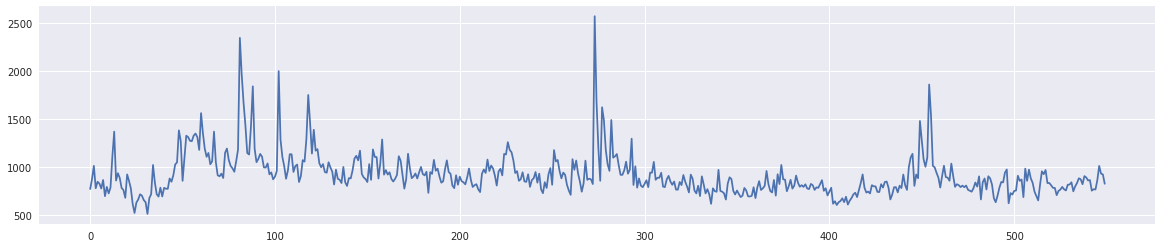

In [13]:
pta(npdata)

In [14]:
def shaperB(data, observations, predictions):
    outX = []
    outY = []
    for a in range(0, len(data) - (observations + predictions)):
        d = data[a:a + observations + predictions]
        outX.append(d[:observations])
        outY.append(d[observations:])
    outX = np.array(outX)
    outY = np.array(outY)
    outX = outX.reshape(outX.shape + (1,))
    outY = outY.reshape(outY.shape + (1,))
    return outX, outY

In [15]:
x, y = shaperB(npdata, 180, 60)

In [16]:
x.shape, y.shape

((310, 180, 1), (310, 60, 1))

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import TimeDistributed

Using TensorFlow backend.


In [19]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from timeit import default_timer as timer

In [24]:
def train_model(x, y, units=64, cells=1, lr=1e-3, epochs=32, verbose=False):
    # create and fit the LSTM network
    model = Sequential()
    if cells == 1:
        model.add(LSTM(units, input_shape=x.shape[1:]))
    else:
        model.add(LSTM(units, input_shape=x.shape[1:], return_sequences=True))
        for _ in range(cells-2):
            model.add(LSTM(units, return_sequences=True))
        model.add(LSTM(units))

    model.add(Dense(y.shape[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.optimizer.lr = lr
    
    start = timer()
    history = model.fit(x, y, epochs=epochs, batch_size=1, verbose=verbose)
    end = timer()

In [25]:
train_model(x, y)

ValueError: Error when checking target: expected dense_2 to have 2 dimensions, but got array with shape (310, 60, 1)